<a href="https://colab.research.google.com/github/PaulToronto/Johns-Hopkins-Coursera-Applied-Calculus-With-Python/blob/main/2_2_Exponential_and_Logarithmic_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Exponential and Logarithmic Functions

In [1]:
import sympy as sym
from math import isnan
import numpy as np
import matplotlib.pyplot as plt

sym.init_printing(use_unicode=True)

In [2]:
def display_f_of_x(str_expr):
    f = sym.parse_expr(str_expr)

    x = f.free_symbols.pop()

    sym.plot(f, 
            line_color='red',
            title='$f(x) = ' + sym.latex(f) + '$\n'
            )

    x_intercepts = list()
    for soln in sym.solve(f):
        if soln.is_real:
            x_intercepts.append(soln)
    x_intercepts = None if len(x_intercepts) == 0 else x_intercepts


    y_intercept = None if isnan(f.subs(x, 0)) else f.subs(x, 0)

    slope = f.diff()
    
    domain = sym.calculus.util.continuous_domain(f, x, sym.S.Reals)

    try:
        the_range = sym.calculus.util.function_range(f, x, sym.S.Reals)
    except NotImplementedError:
        the_range = 'Not found'

    print('\nX-intercepts:')
    display(x_intercepts)
    print('\nY-intercept:')
    display(y_intercept)
    print('\nSlope (derivative):')
    display(slope)
    print('\nDomain:')
    display(domain)
    print('\nRange:')
    display(the_range)

## 2.2.1 Theory: Exponential Functions

### Definition

A function, $f(x)$, is **exponential** if it is of the form $f(x) = a^{x}, a > 0$.

- Note that $f(x) = x^{2}$ is not an exponential function, it is a power function

### Example: $f(x) = 2^{x}$

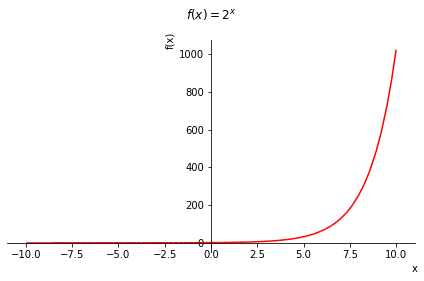


X-intercepts:


None


Y-intercept:



Slope (derivative):



Domain:



Range:


In [3]:
display_f_of_x('2**x')

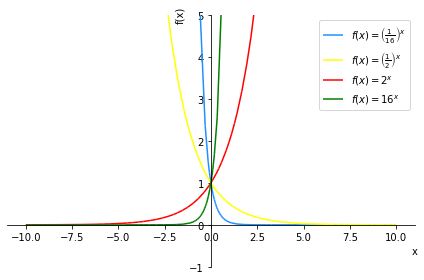

In [4]:
x = sym.symbols('x')

expr1 = sym.Rational(1, 16)**x
expr2 = sym.Rational(1, 2)**x
expr3 = 2**x 
expr4 = 16**x

fig = sym.plot(expr1, expr2, expr3, expr4,
               ylim=[-1, 5],
               legend=True,
               show=False)

fig[0].line_color = 'dodgerblue'
fig[0].label = '$f(x) = ' + sym.latex(expr1) + '$'
 
fig[1].line_color = 'yellow'
fig[1].label = '$f(x) = ' + sym.latex(expr2) + '$'

fig[2].line_color = 'red'
fig[2].label = '$f(x) = ' + sym.latex(expr3) + '$'

fig[3].line_color='green'
fig[3].label = '$f(x) = ' + sym.latex(expr4) + '$'

fig.show()

### Three Types of Exponential Functions

1. $0 < a < 1$
2. $a = 1$
3. $a > 1$

In [5]:
def plot_many(*args):
    p = sym.plot(show=False, ylim=[-1, 5], legend=True)
    for i, arg in enumerate(*args):
        p.append(sym.plot(arg, show=False)[0])
        p[i].label = '$f(x) = ' + sym.latex(arg) + '$'
    
    p[0].line_color = 'red'
    p[1].line_color = 'lime'
    p[len(*args) - 1].line_color = 'orange'
    p.show()

#### Type 1: $0 < a < 1$

- exponential decay
- this is a decreasing function
- y-intercept is always $1$
- horizontal asymptote at $y = 0$

In [6]:
x = sym.symbols('x')
exprs = [sym.Rational(n, 10)**x for n in (np.linspace(1, 9, 9))]
exprs

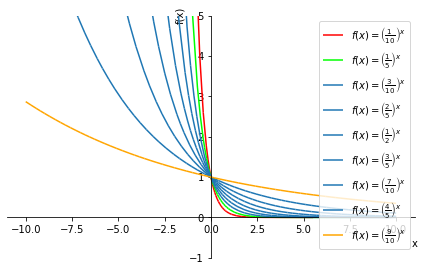

In [7]:
plot_many(exprs)

#### Type 2: $a = 1$

- not really exponential
- we don't study this one

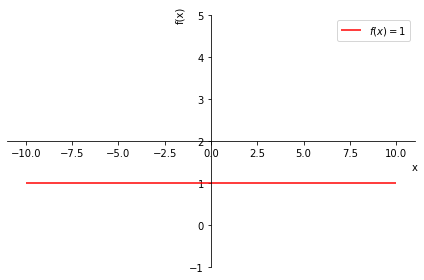

In [8]:
x = sym.symbols('x')
p = sym.plot(1**x, show=False, legend=True, ylim=[-1, 5], axis_center='center')
p[0].label = '$f(x) = ' + sym.latex(1**x) + '$'
p[0].line_color = 'red'

p.show()

#### Type 3: $a > 1$

- exponential growth
- this is an increasing function
- y-intercept is always $1$
- horizontal asymptote at $y = 0$

In [9]:
x = sym.symbols('x')
exprs = [a**x for a in (np.linspace(2, 10, 9))]
exprs

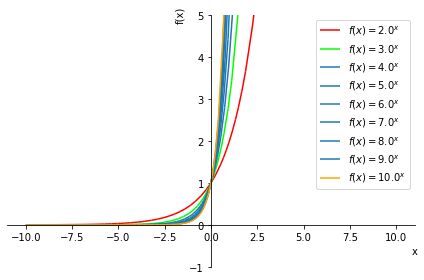

In [10]:
plot_many(exprs)

### Example: $f(x) = -2^{-x} - 1$

Let's plot this in steps:

In [11]:
x = sym.symbols('x')

#### Step 1: Plot $f(x) = 2^x$

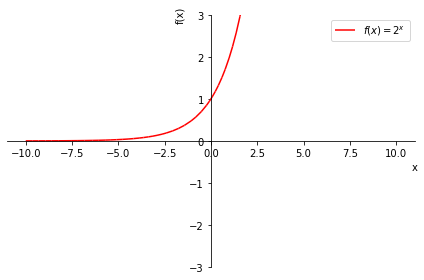

In [12]:
p = sym.plot(2**x, legend=True, show=False, ylim=[-3, 3])

p[0].label = '$f(x) = ' + sym.latex(2**x) + '$'
p[0].line_color = 'red'

p.show()

#### Step 2: Plot $f(x) = 2^{-x}$

- When $x$ is replaced with $-x$ we have a refelection in the y-axis.

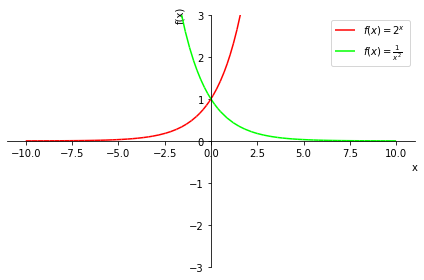

In [13]:
p.append(sym.plot(2**(-x), show=False)[0])

p[1].label = '$f(x) = ' + sym.latex(x**(-2)) + '$'
p[1].line_color = 'lime'

p.show()

#### Step 3: Plot $f(x) = -2^{-x}$

- When we negate the function, replacing $y$ with $-y$ we have a reflection in the x-axis.

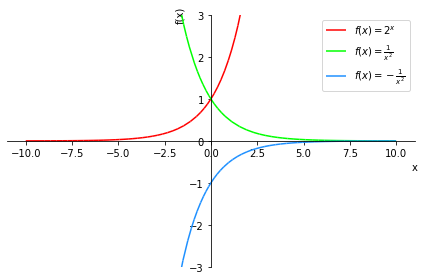

In [14]:
p.append(sym.plot(-2**(-x), show=False)[0])

p[2].label = '$f(x) = ' + sym.latex(-x**(-2)) + '$'
p[2].line_color = 'dodgerblue'

p.show()

#### Step 4: Plot $f(x) = -2^{-x} - 1$

- Subtracting 1 from the function shifts the graph down by $1$ unit. 

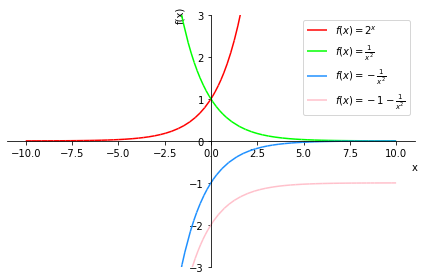

In [15]:
p.append(sym.plot(-2**(-x) - 1, show=False)[0])

p[3].label = '$f(x) = ' + sym.latex(-x**(-2) - 1) + '$'
p[3].line_color = 'pink'

p.show()

### Example: $f(x) = e^{x}$

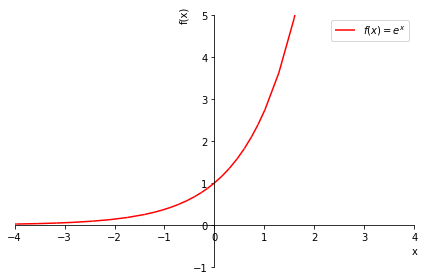

In [16]:
x = sym.symbols('x')
sym.plot(sym.exp(x), 
         ylim=[-1, 5], xlim=[-4, 4],
         legend=True, 
         label= '$f(x) = ' + sym.latex(sym.exp(x)) + '$',
         line_color='red',
         show=True);

In [17]:
x = sym.symbols('x')
sym.calculus.util.continuous_domain(sym.exp(1)**x, x, sym.S.Reals)

In [18]:
x = sym.symbols('x')

try:
    the_range = sym.calculus.util.function_range(sym.exp(1)**x, x, sym.S.Reals)
except NotImplementedError:
    the_range = 'Not found'

the_range

### Example: Find the domain of $f(x) = \frac{1 - e^{x}}{1 - e^{1 - x^{2}}}$

In [19]:
# the denominator can't be equal to 0
# solve for x when the denominator is 0
sym.solve(1 - sym.exp(1 - x**2))

#### By hand

$
\begin{align}
1 - e^{1 - x^{2}} &= 0 \\
e^{1 - x^{2}} &= 1 \\
\ln{e^{1 - x^{2}}} &= \ln{1} \\
1 - x^{2} = 0 \\
x^{2} - 1 = 0 \\
(x + 1)(x - 1) = 0 \\
x = -1, x = 1
\end{align}
$

The domain is expressed below in 3 different ways:

Domain: $\left(-\infty, -1\right) \cup \left(-1, 1\right) \cup \left(1, \infty\right)$




Domain: $\{x \in \mathbb{R}\ : x \ne -1\ and\: x \ne 1\}$

Domain: $\mathbb{R} \backslash \{\pm1\}$

### Example: $f(x) = 5^{x}$

Find the `Difference Quotient`

$
\begin{align}
\frac{f\left(x + h\right) - f\left(x\right)}{h} 
&= \frac{5^{x + h} - 5^{x}}{h} \\
&= \frac{5^{x} 5^{h} - 5^{x}}{h} \\
&= \frac{5^{x}\left(5^{h} - 1\right)}{h}
\end{align}
$

### Example: $f(x) = \frac{1 - e^{\frac{1}{x}}}{1 + e^{\frac{1}{x}}}$ is an odd function. True or False? 

$
\begin{align}
f(-x) &= \frac
{1 - e^{\frac{1}{-x}}}
{1 + e^{\frac{1}{-x}}} \\
&= \frac
{\frac{1}{1} - \frac{1}{e^{\frac{1}{x}}}}
{\frac{1}{1} + \frac{1}{e^{\frac{1}{x}}}} \\
&= \frac
{\frac{e^{\frac{1}{x}} - 1}{e^{\frac{1}{x}}}}
{\frac{e^{\frac{1}{x}} + 1}{e^{\frac{1}{x}}}} \\
&= \frac 
{e^{\frac{1}{x}} - 1}
{e^{\frac{1}{x}} + 1} \\
&= \frac 
{- 1 + e^{\frac{1}{x}}}
{1 + e^{\frac{1}{x}}} \\
&= -\frac 
{1 - e^{\frac{1}{x}}}
{1 + e^{\frac{1}{x}}} \\
&= -f(x) \\
\end{align}
$

$\therefore$ f(x) is an odd function

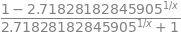

In [20]:
x = sym.symbols('x')

f1 = (1 - np.e**(1/x)) / (1 + np.e**(1/x))
f1

## 2.2.2 Theory: Logarithmic Functions

### Two ways to think about logaritms

1. As the inverse of the exponential function
2. As an exponent

#### `1.` As the inverse of the exponential function

- If $a \ne 0$, $a \ne 1$, $f(x) = a^{x}$ is either increasing ($a > 1$) or decreasing ($a < 1$)
- The graph is $1:1$, so it passes the horizontal line test
- If the graph is $1:1$, it has an inverse. 
- Since $f(x) = a^{x}$ is $1:1$, it has and inverse: $f^{-1}(x)$
    - **Logarithmic functions** with the base $a$

$$
f(x) = \log_{a}{x} \\
\log_{a}x = y \iff a^{y} = x
$$

##### Example: $\log_{2}{x}$

- This is the inverse of $f(x) = 2^{x}$
- Whatever $2^{x}$ does to the function, $\log_{2}{x}$ will undo it
- The inverse is a **reflection in the line y = x$

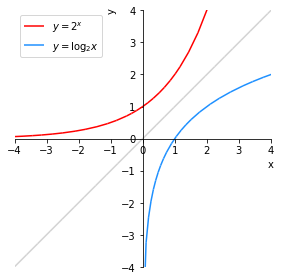

In [21]:
p = sym.plot(2**x, sym.log(x, 2), x,
             xlim=(-4, 4), ylim=(-4, 4), 
             aspect_ratio=(1, 1), ylabel='y',
             legend=True, show=False)

p[0].line_color = 'red'
p[0].label = '$y = ' + sym.latex(p[0].expr) + '$'

p[1].line_color = 'dodgerblue'
p[1].label = '$y = \log_{2}{x}$'

p[2].line_color = 'lightgray'
p[2].label = None

plt.rcParams['legend.loc'] = 'upper left'
p.show()
plt.rcParams.update(plt.rcParamsDefault)

$\log_{2}{x} = 0 \iff 2^{0} = x$

- This happens when $x = 1$
- The x-intercept is $(0, 1)$

- This is a general rule: $\log_{b}{1} = 0$
- This is because $b^{0}$ is always $1$

In [22]:
expr = sym.log(x, 2)
expr

In [23]:
domain = sym.calculus.util.continuous_domain(expr, x, sym.S.Reals)

try:
    the_range = sym.calculus.util.function_range(expr, x, sym.S.Reals)
except NotImplementedError:
    the_range = 'Not found'

In [24]:
domain

In [25]:
the_range

It also has a vertical asymptote at $x = 0$

#### `2.` As an exponent

##### Log Rules

1. $\log_{a}{xy} = \log_{a}{x} + \log_{a}{y}$
    - logarithms turn multiplication into addition
    - logarithms "live upstairs" where products become addition
    - $a^{x} \cdot a^{y} = a^{x + y}$
2. $\log_{a}{\frac{x}{y}} = \log_{a}{x} - \log_{a}{y}$
    - logarithms turn division into subtraction
    - $\frac{a^{x}}{a^{y}} = log_{a}{x} - \log_{a}{y}$
3. $\log_{a}{x^{r}} = r\log_{a}{x}$
    - exponents fall out in front
    - logarithms turn a power into a product
    - $\left(a^{x}\right)^{r} = a^{xr}$
4. $\log_{a}{1} = 0$ and $\log_{a}{0} = undefined$
    - not really rules, but they're handy to remember

##### Example: $\log_{5}{125}$

$
\begin{align}
\log_{5}{125} &= \log_{5}{\left(5 \cdot 25\right)} \\
&= \log_{5}{5} + \log_{5}{\left(5 \cdot 5\right)} \\
&= \log_{5}{5} + \log_{5}{5} + \log_{5}{5} \\
&= 1 + 1 + 1 \\
&= 3
\end{align}
$

$
log_{5}{125} = x \iff 5^{x} = 125
$

In [26]:
sym.log(125, 5), np.log(125) / np.log(5)

In [27]:
5**(sym.log(125, 5)), 5**(np.log(125) / np.log(5))

##### Simplify: $\log_{2}{6} - log_{2}{15} + \log_{2}{20}$

$
\begin{align}
\log_{2}{6} - log_{2}{15} + \log_{2}{20}
&= \log_{2}\left({\frac{6}{15} \cdot 20}\right) \\
&= \log_{2}{8} \\
&= \log_{2}{2^{3}} \\
&= 3 \cdot log_2{2} \\
&= 3 \cdot 1 \\
&= 3
\end{align}
$

In [28]:
expr = sym.log(6, 2) - sym.log(15, 2) + sym.log(20, 2)
expr.evalf()

In [29]:
np.log(6)/np.log(2) - np.log(15)/np.log(2) + np.log(20)/np.log(2)

## 2.2.3 Theory: The Natural Logarithm

$$
f(x) = \ln{x} \\
\ln{x} = y \iff e^{y} = x
$$

1. $\ln{e^{x}} = x$
2. $e^{\ln{x}} = x$
3. $\ln(e) = 1$
4. $\ln(1) = 0$
5. $\ln(0) = undefined$

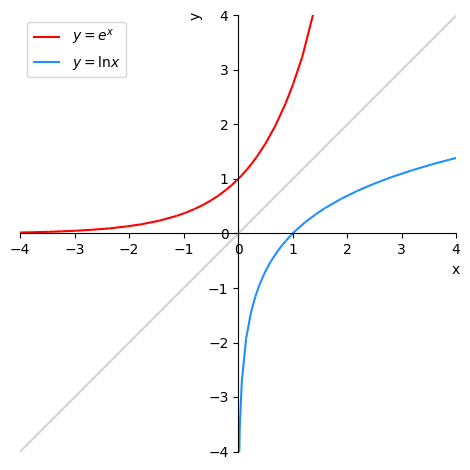

In [30]:
p = sym.plot(sym.exp(1)**x, sym.log(x, sym.exp(1)), x,
             xlim=(-4, 4), ylim=(-4, 4), 
             aspect_ratio=(1, 1), ylabel='y',
             legend=True, show=False)

p[0].line_color = 'red'
p[0].label = '$y = ' + sym.latex(p[0].expr) + '$'

p[1].line_color = 'dodgerblue'
p[1].label = '$y = \ln{x}$'

p[2].line_color = 'lightgray'
p[2].label = None

plt.rcParams['legend.loc'] = 'upper left'
p.show()
plt.rcParams.update(plt.rcParamsDefault)

In [31]:
expr = sym.log(x, sym.exp(1))
expr

In [32]:
domain = sym.calculus.util.continuous_domain(expr, x, sym.S.Reals)

try:
    the_range = sym.calculus.util.function_range(expr, x, sym.S.Reals)
except NotImplementedError:
    the_range = 'Not found'

In [33]:
domain

In [34]:
the_range

It also has a vertical asymptote at $x = 0$

### Example: Solve for $x$

$\ln\left({\ln{x}}\right) = 1$

$
\begin{align}
\ln\left({\ln{x}}\right) &= 1 \\
e^{\ln\left({\ln{x}}\right)} &= e^{1} \\
\ln{x} &= e \\
e^{\ln{x}} &= e^{e} \\
x &= e^e
\end{align}
$

In [35]:
expr = sym.exp(1)**sym.exp(1)
expr

In [36]:
expr.evalf()

In [37]:
np.e**np.e

In [38]:
x = sym.symbols('x')
expr = sym.log(sym.log(x, sym.exp(1)), sym.exp(1))
expr

In [39]:
sym.solve(expr - 1, x)[0].evalf()

### Example: Solve for $x$

$2^{x-5} = 3$

$
\begin{align}
2^{x-5} &= 3 \\
\log_{2}{2^{x-5}} &= \log_{2}{3} \\
x - 5 &= \log_{2}{3} \\
x &= \log_{2}{3} + 5
\end{align}
$

Alternately,

$
\begin{align}
2^{x-5} &= 3 \\
\ln{2^{x-5}} &= \ln{3} \\
\left(x-5\right) \cdot \ln{2} &= \ln{3} \\
x - 5 &= \frac{\ln{3}}{\ln{2}} \\
x &= \frac{\ln{3}}{\ln{2}} + 5
\end{align}
$

In [40]:
expr = sym.log(3, 2) + 5
expr

In [41]:
# the alternate method
(np.log(3) / np.log(np.e)) / (np.log(2) / np.log(np.e)) + 5

In [42]:
expr.evalf()

In [43]:
np.log(3) / np.log(2) + 5

In [44]:
x = sym.symbols('x')

expr = 2**(x - 5)
expr

In [45]:
sym.solve(expr - 3, x)[0].evalf()

### Example: Find the domain of $f$ and $f^{-1}$

$f(x) = \sqrt{3 - e^{2x}}$

#### Domain of $f$

$
\begin{align}
3 - e^{2x} &\ge 0 \\
e^{2x} &\le 3 \\
\ln{e^{2x}} &\le \ln{3} \\
2x &\le \ln{3} \\
x &\le \frac{\ln{3}}{2}
\end{align}
$

Domain: $(-\infty, \frac{\ln{3}}{2}]$

In [46]:
x = sym.symbols('x')
expr = sym.sqrt(3 - sym.exp(1)**(2*x))

domain = sym.calculus.util.continuous_domain(expr, x, sym.S.Reals)
domain

#### Inverse of $f$: $f^{-1}$

If the function $f$ has equation $y = \sqrt{3 - e^{2x}}$, then $f^{-1}$ has the equation $x = \sqrt{3 - e^{2y}}$.

All we need to do is solve for $y$.

$
\begin{align}
x &= \sqrt{3 - e^{2y}} \\ 
x^{2} &= 3 - e^{2y} \\
-x^{2} + 3 &= e^{2y} \\
\ln\left({-x^{2} + 3}\right) &= \ln{e^{2y}} \\
\ln\left({-x^{2} + 3}\right) &= 2y \\
y &= \frac{1}{2}\ln\left({-x^{2} + 3}\right)
\end{align}
$

$
\therefore f^{-1}(x) = \frac{\ln\left({-x^{2} + 3}\right)}{2}
$

In [47]:
x = sym.symbols('x')

f = sym.sqrt(3 - sym.exp(1)**(2*x))
f

In [48]:
f_inv = sym.log(-x**2 + 3, sym.exp(1)) / 2
f_inv

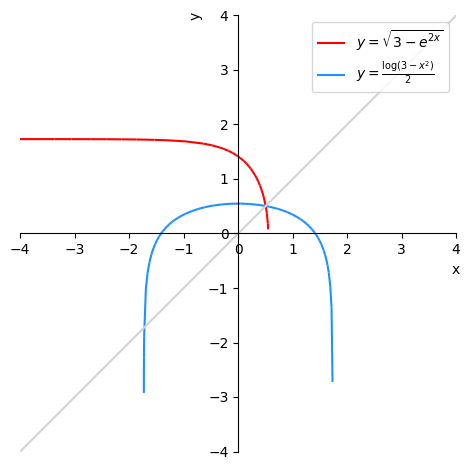

In [49]:
p = sym.plot(f, f_inv, x,
             xlim=(-4, 4), ylim=(-4, 4), 
             aspect_ratio=(1, 1), ylabel='y',
             legend=True, show=False)

p[0].line_color = 'red'
p[0].label = '$y = ' + sym.latex(p[0].expr) + '$'

p[1].line_color = 'dodgerblue'
p[1].label = '$y = ' + sym.latex(p[1].expr) + '$'

p[2].line_color = 'lightgray'
p[2].label = None

p.show()

#### Domain of $f^{-1}$

$f^{-1}(x) = \frac{1}{2}\ln\left({3 - x^{2}}\right)$

$
\begin{align}
3 - x^{2} &\gt 0 \\
x^{2} &\lt 3 \\ 
x^{2} - 3 &\lt 0 \\
(x + \sqrt{3})(x - \sqrt{3}) &\lt 0 
\end{align}
$

<b>Case 1:</b>

$x + \sqrt{3} < 0$ and $x - \sqrt{3} > 0$

$\implies$

$x < -\sqrt{3}$ and $x > \sqrt{3}$

Which is impossible.

<b>Case 2:</b>

$x + \sqrt{3} > 0$ and $x - \sqrt{3} < 0$

$\implies$

$x > -\sqrt{3}$ and $x < \sqrt{3}$

$\therefore x \in (-\sqrt{3}, \sqrt{3})$

In [50]:
x = sym.symbols('x')

domain = sym.calculus.util.continuous_domain(f_inv, x, sym.S.Reals)
domain

In [51]:
sym.sqrt(3).evalf()

## 2.2.4 Reading: Exponential and Logarithmic Functions

### Exponential Functions

- An **exponential function** has the form $f(x) = a \cdot b^{x}$ where $b$ is a positive number and $b \ne 1$
- $b$ is called the base
- **Domain**: $\left(-\infty, \infty \right)$
- **Range**: 
    - If $b \gt 0$, then the range of $f(x) = a \cdot b^{x}$ is the positive numbers: $\left(0, \infty \right)$
    - if $b \lt 0$, then the range of $f(x)$ is the negative numbers: $\left( -\infty, 0 \right)$
- **Horizontal Asymptote**: $y = 0$ (the x-axis)
- ***y*-intercept**: $\left(0, a \right)$

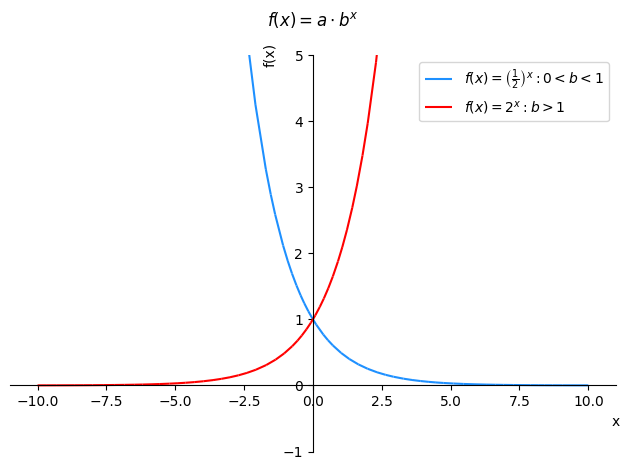

In [52]:
x = sym.symbols('x')

expr1 = sym.Rational(1, 2)**x
expr2 = 2**x 

fig = sym.plot(expr1, expr2,
               ylim=[-1, 5],
               title='$f(x) = a \cdot b^{x}$\n',
               legend=True,
               show=False)

 
fig[0].line_color = 'dodgerblue'
fig[0].label = '$f(x) = ' + sym.latex(expr1) + ': 0 < b < 1$'

fig[1].line_color = 'red'
fig[1].label = '$f(x) = ' + sym.latex(expr2) + ': b > 1$'


fig.show()

### Natural Exponential Function

- Exponential function with base $e$
- Has the form $f(x) = e^{x}$
- The number $e$ is called **Euler's Number**

$
e = \lim_{n \to \infty}\left(1 + \frac{1}{n}\right)^{n} \approx 2.71818...
$

### Logarithmic Functions

- An **logarithmic function** has the form $f(x) = \log_{b}{x}$ where $b$ is a positive number and $b \ne 1$
- $b$ is called the base
- logarithmic functions are the inverse of the exponential functions
    - $y = \log_{b}{x} \iff b^{y} = x$
        - moreover, we have
        - $\log_{b}\left({b^{x}}\right) = b^{\log_{b}{x}} == x$
- **Domain**: $\left(0, \infty \right)$
- **Range**: $\left(-\infty, \infty \right)$
- **Vertical Asymptote**: $x = 0$ (the y-axis)
- ***x*-intercept**: $\left(0, 1\right)$

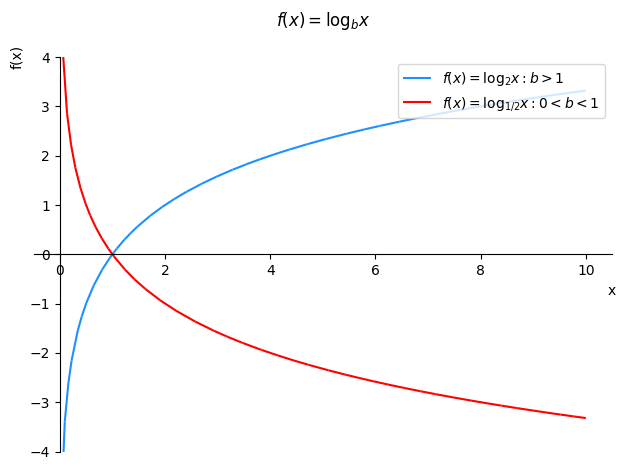

In [53]:
x = sym.symbols('x')

p = sym.plot(sym.log(x, 2),
             sym.log(x, 1/2),
             ylim=[-4, 4],
             title='$f(x) = \log_{b}{x}$\n',
             legend=True,
             show=False)

p[0].line_color='dodgerblue'
p[0].label = '$f(x) = \log_{2}{x} : b > 1$'

p[1].line_color='red'
p[1].label = '$f(x) = \log_{1/2}{x}: 0 < b < 1$'


p.show()

### Natural Logarithm

- The **natural logarithm** is the logarithm with base $e$
- It has it's own notation: $\log_{e}{x} = \ln{x}$

### Applications

Exponential functions can be used to model quantities that increase or decrease in special ways.

- **Exponential Growth**: An increasing exponential function grows slowly at first, then more quickly as time goes on. For example, populations usually grow exponentially over time.
- **Exponential Decay**: A decreasing exponential function shrinks quickly at first, then more slowly as time goes on. For example, air pressure decreases exponentially as altitude increases.

A quantity $P$ that grows exponentially over time can be modeled by the function

$P\left(t\right) = P_{0}e^{kt}$

where $P_{0}$ is the initial quantity (when $t = 0$) and $k > 0$. The constant $k$ is called the *rate of growth*. 

A quantity $Q$ that decays exponentially over time can be modeled by the function

$Q\left(t\right) = Q_{0}e^{-kt}$

where $Q_{0}$ is the initial quantity (when $t = 0$) and $k > 0$. The constant $k$ is called the *rate of decay*. 

## 2.2.5 Reading: Exponents and Logarithms in SymPy

### Exponential Expressions

In [54]:
b, x = sym.symbols('b x')
b**x

In [55]:
x = sym.symbols('x')
sym.exp(x)

In [56]:
sym.exp(2)

In [57]:
sym.exp(2).evalf()

### Logarithmic Expressions

- In sympy $\frac{\log{x}}{\log{b}}$ is the same as $\log_{b}{x}$
- Also, $\log_{e}{x}$ is the same as $\ln{x}$ and $\log_{x}$

In [58]:
b, x = sym.symbols('b x')
sym.log(x, b)

In [59]:
x = sym.symbols('x')
sym.log(x, sym.exp(1))

In [60]:
x = sym.symbols('x')
sym.ln(x)

### Evaluating

In [61]:
expr = sym.exp(2)
expr

In [62]:
expr.evalf()

### Simplification

#### Simplifying Exponentials

##### Multiplication Property

$b^{n} \cdot b^{p} = b^{n + p}$

for all $b$, $n$, $p$

In [63]:
p = sym.symbols('p')
n = sym.symbols('n')
b = sym.symbols('b') 

In [64]:
expr1 = b**n * b**p

In [65]:
expr2 = b**(n + p)

In [66]:
expr1, sym.powsimp(expr1)

In [67]:
expr2, sym.expand_power_exp(expr2)

##### Power Property

$\left(b^{n}\right)^{p}$

for all numbers $b$, $n$ and for all integers, $p$

In [68]:
p = sym.symbols('p', integer=True)
n = sym.symbols('n')
b = sym.symbols('b') 

In [69]:
expr3 = (b**n)**p
# Power of a product, `powdnest(expr)`, happens automatically
#  - but only if p has the integer assumption
expr3

In [70]:
expr3, sym.powdenest(expr3)

##### Power of a Product

$a^{n} \cdot b^{n} = \left(a \cdot b \right)^{n}$

for all real numbers $n$ and all positive real numbers $a$, $b$

In [71]:
n = sym.symbols('n', real=True)
a = sym.symbols('a', real=True, positive=True)
b = sym.symbols('b', real=True, positive=True) 

In [72]:
expr4 = a**n * b**n 

In [73]:
expr5 = (a * b)**n

In [74]:
expr4, sym.powsimp(expr4)

In [75]:
expr5, sym.expand_power_base(expr5)

#### Simplifying Logarithms

Applies to all logarithms including the natural logarithm

##### Product Property

$\ln(x \cdot y) = \ln{x} + \ln{y}$

for all positive numbers $x$, $y$

In [76]:
x = sym.symbols('x', positive=True)
y = sym.symbols('y', positive=True)

In [77]:
expr6 = sym.ln(x * y)

In [78]:
expr7 = sym.ln(x) + sym.ln(y)

In [79]:
expr6, sym.expand_log(expr6)

In [80]:
expr7, sym.logcombine(expr7)

##### Log of a Power 

$\ln{x^{n}} = n \cdot \ln{x}$

for all real numbers $n$ and postive numbers $x$

In [81]:
n = sym.symbols('n', real=True)
x = sym.symbols('x', positive=True)

In [82]:
expr8 = sym.ln(x**n)
expr8

In [83]:
expr9 = n * sym.ln(x)
expr9

In [84]:
expr8, sym.expand_log(expr8)

In [85]:
expr9, sym.logcombine(expr9)

## 2.2.6 Reading: Equations in SymPy

### Solving an Equation

If `solveset` doesn't work, try `solve`

#### Example: $5x + 3 = 1$ for $x$

In [86]:
x = sym.symbols('x')

In [87]:
sym.solveset(5*x + 3 - 1, x)

In [88]:
sym.solveset(sym.Eq(5*x + 3, 1), x)

#### Example: $2^{x} = 8$ for $x$

In [89]:
sym.solveset(2**x - 8, x)

In [90]:
sym.solveset(sym.Eq(2**x, 8), x)

In [91]:
sym.solveset(2**x - 8, x, domain = sym.S.Reals)

In [92]:
sym.solveset(sym.Eq(2**x, 8), x, domain = sym.S.Reals)

## 2.2.7 Python: Exponentials and Logarithms

In [93]:
import math

In [94]:
math.exp(1), sym.exp(1), np.e

In [95]:
math.exp(-1), sym.exp(-1), np.e**-1

In [96]:
math.exp(0), sym.exp(0), np.e**0

- `math.log(x, [base=math.e])`: default is base e
- `sympy.log(x, b)`: default is base e
- `numpy.log(x)`: base is e

In [97]:
math.log(1), sym.log(1), np.log(1)

In [98]:
math.log(10), sym.log(10).evalf(), np.log(10)

In [99]:
math.log(10, 5), sym.log(10, 5).evalf(), np.log(10)/np.log(5)

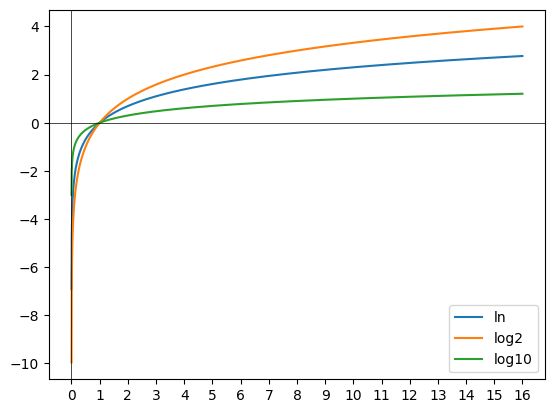

In [100]:
def create_graph():
    x = np.linspace(0.001, 16, 2000)
    y_e = np.log(x) # natural log, y = ln(x)
    y_2 = np.log2(x) # base 2
    y_10 = np.log10(x) # base 10

    plt.plot(x, y_e)
    plt.plot(x, y_2)
    plt.plot(x, y_10)

    plt.legend(['ln', 'log2', 'log10'], loc='lower right')
    plt.xticks(range(math.floor(min(x)),
                     math.ceil(max(x)) + 1))
    plt.axhline(0, color='black', linewidth='0.5')
    plt.axvline(0, color='black', linewidth='0.5')

    plt.show()

create_graph()

### Fun example to find digits

In [101]:
def digit_counter(n):
    print('The number of digits is ', 
          int(math.log10(n) + 1))

In [102]:
digit_counter(45789)

The number of digits is  5


## 2.2.8 Reading: Sample Problems